# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
rm(list = ls())   # Erase everything, start from scratch!

# Load the data from package funFEM
suppressPackageStartupMessages({
    library(funFEM) # Suppress all loading package messages
})
data(velib)
#help("velib")

In [2]:
# Data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

# Consider a subsample
set.seed(0)
n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# Select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

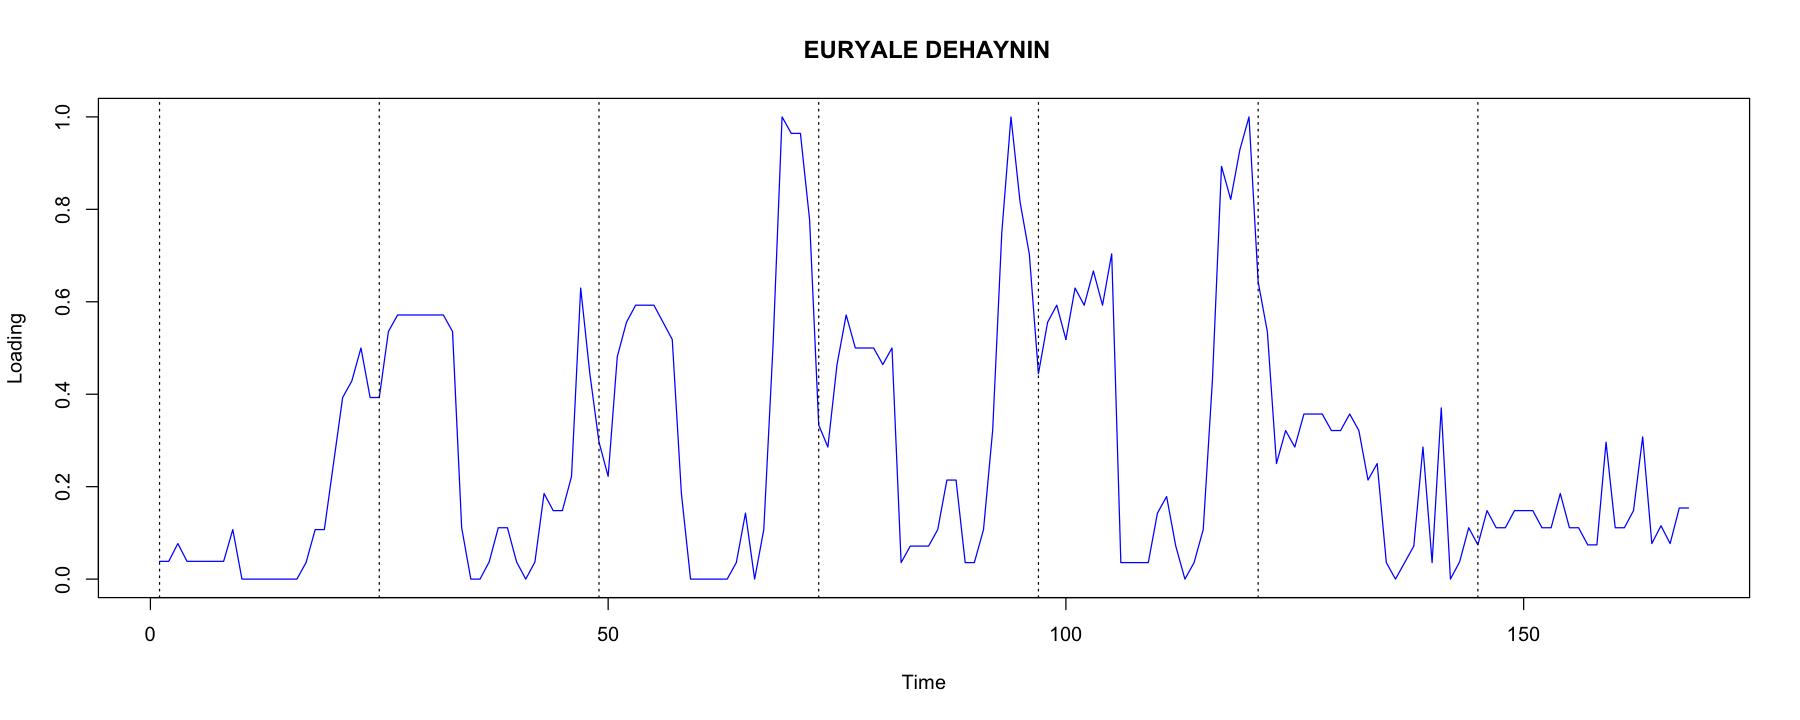

In [3]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))
options(repr.plot.width=15, repr.plot.height=6)

plot(x[1,], col="blue", type="l", ylim=c(0, 1), 
     xlab="Time", ylab="Loading", main=rownames(x)[1])
abline(v=timeTick, lty="dotted")

## Descriptive statistics

We start by plotting the loading profile evolution through time for the first 16 stations on the list. With these graphs we can observe that in general the loading is periodical, following a similar pattern each day. 

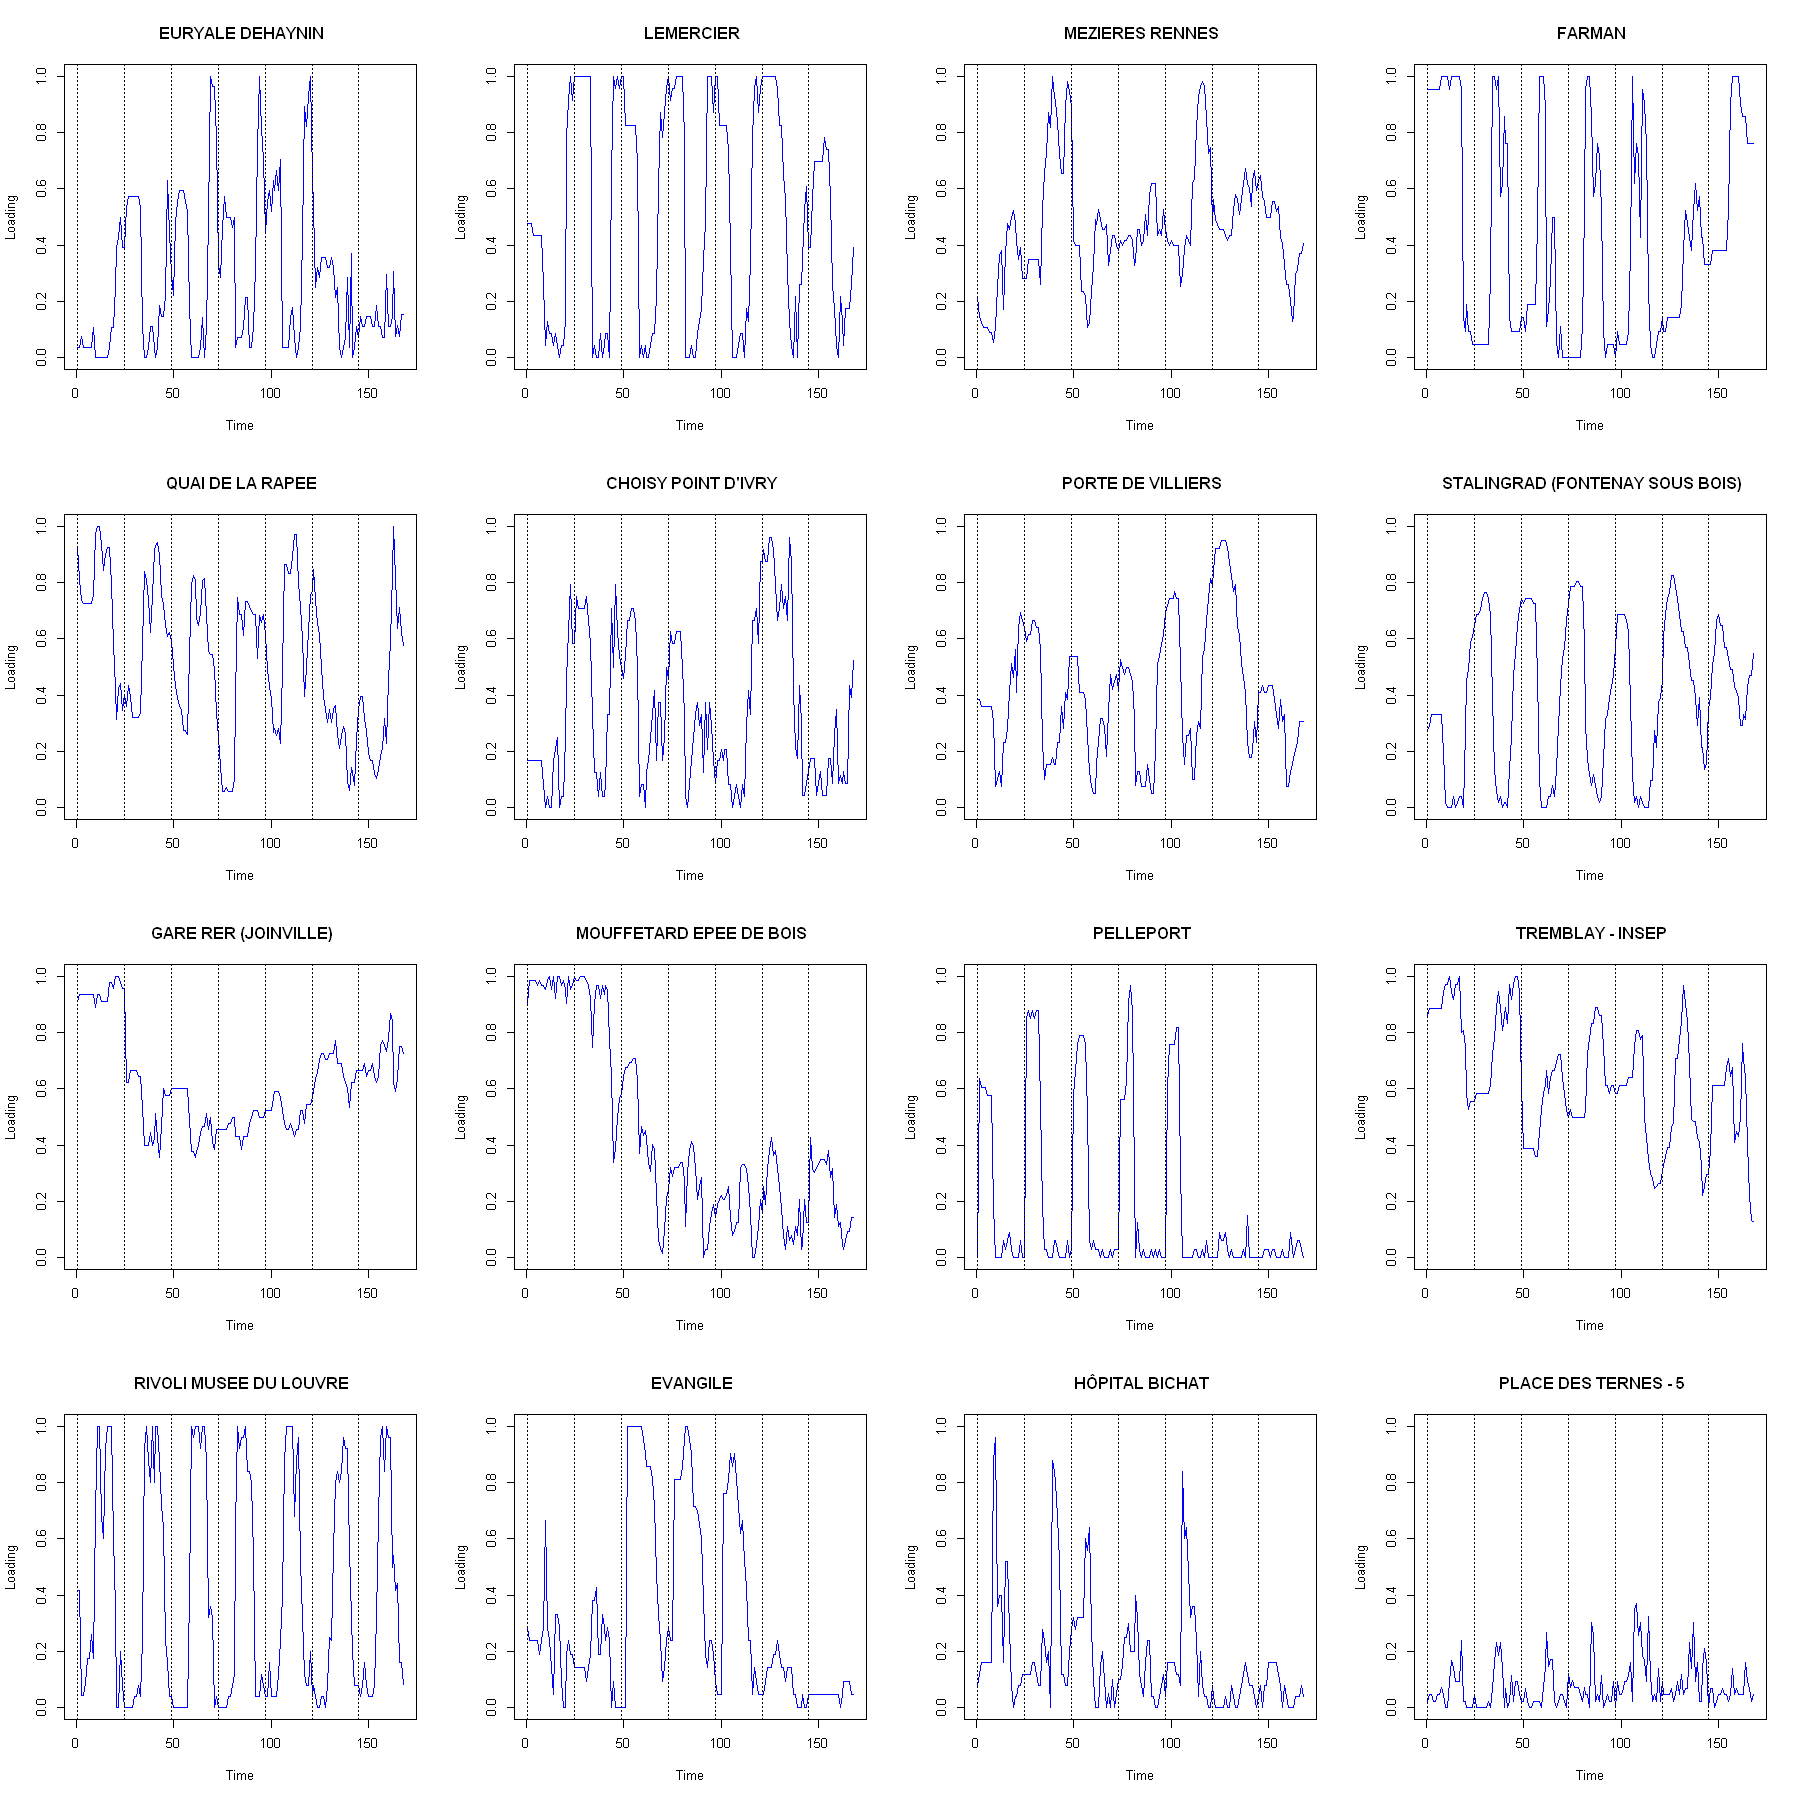

In [4]:
par(mfrow=c(4,4))
options(repr.plot.width=15, repr.plot.height=15)
for (i in 1:16) {
    plot(x[i,], col="blue", type="l", ylim=c(0, 1), xlab="Time",
         ylab="Loading", main=rownames(x)[i])
    abline(v=timeTick, lty="dotted")
}

We then plot 168 boxplots side by side corresponding to each variable (time of the week). These boxplots are also separeted by blue vertical lines to represent the seven days of the week.

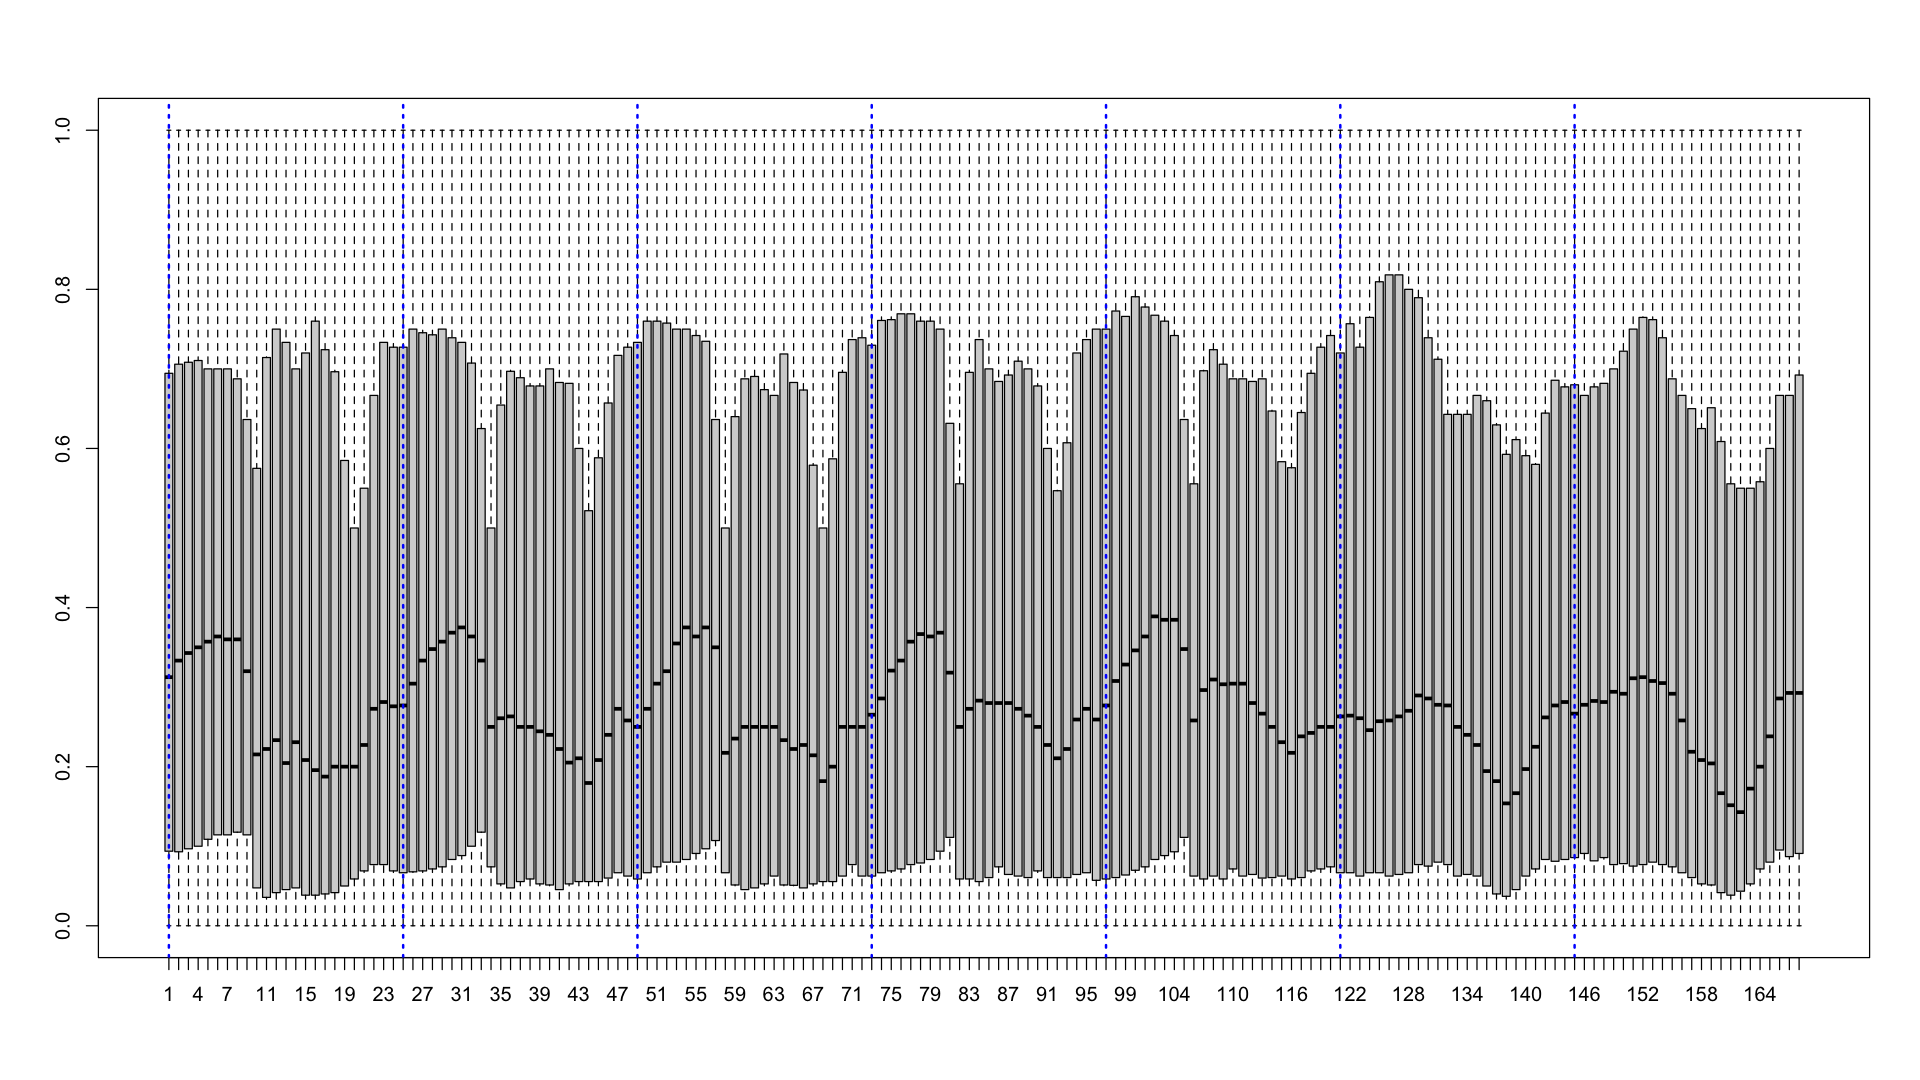

In [8]:
options(repr.plot.width=16, repr.plot.height=9)
boxplot(x)
abline(v=timeTick, lty="dotted", col="blue", lwd=2)

This graph shows that the median beahves a certain way during the weekdays, and a different way during the weekend. This reflects how bikes are used differently when people are working and when they are on their day off. During the weekdays we see that the median reaches a peak at around 8 AM and then it sudenly drops. This might be due to the large amount of people who use the bikes to go to work or to school at that time.
During the weekend the median reaches a minimum value at around 5 PM, which might occur beacause of all the people who like to go out on the weekend to have fun.

We then seek to find if there is any correlation between two chosen variables. We therefore plot loading at one time versus another time to see if there is a linear correlation.

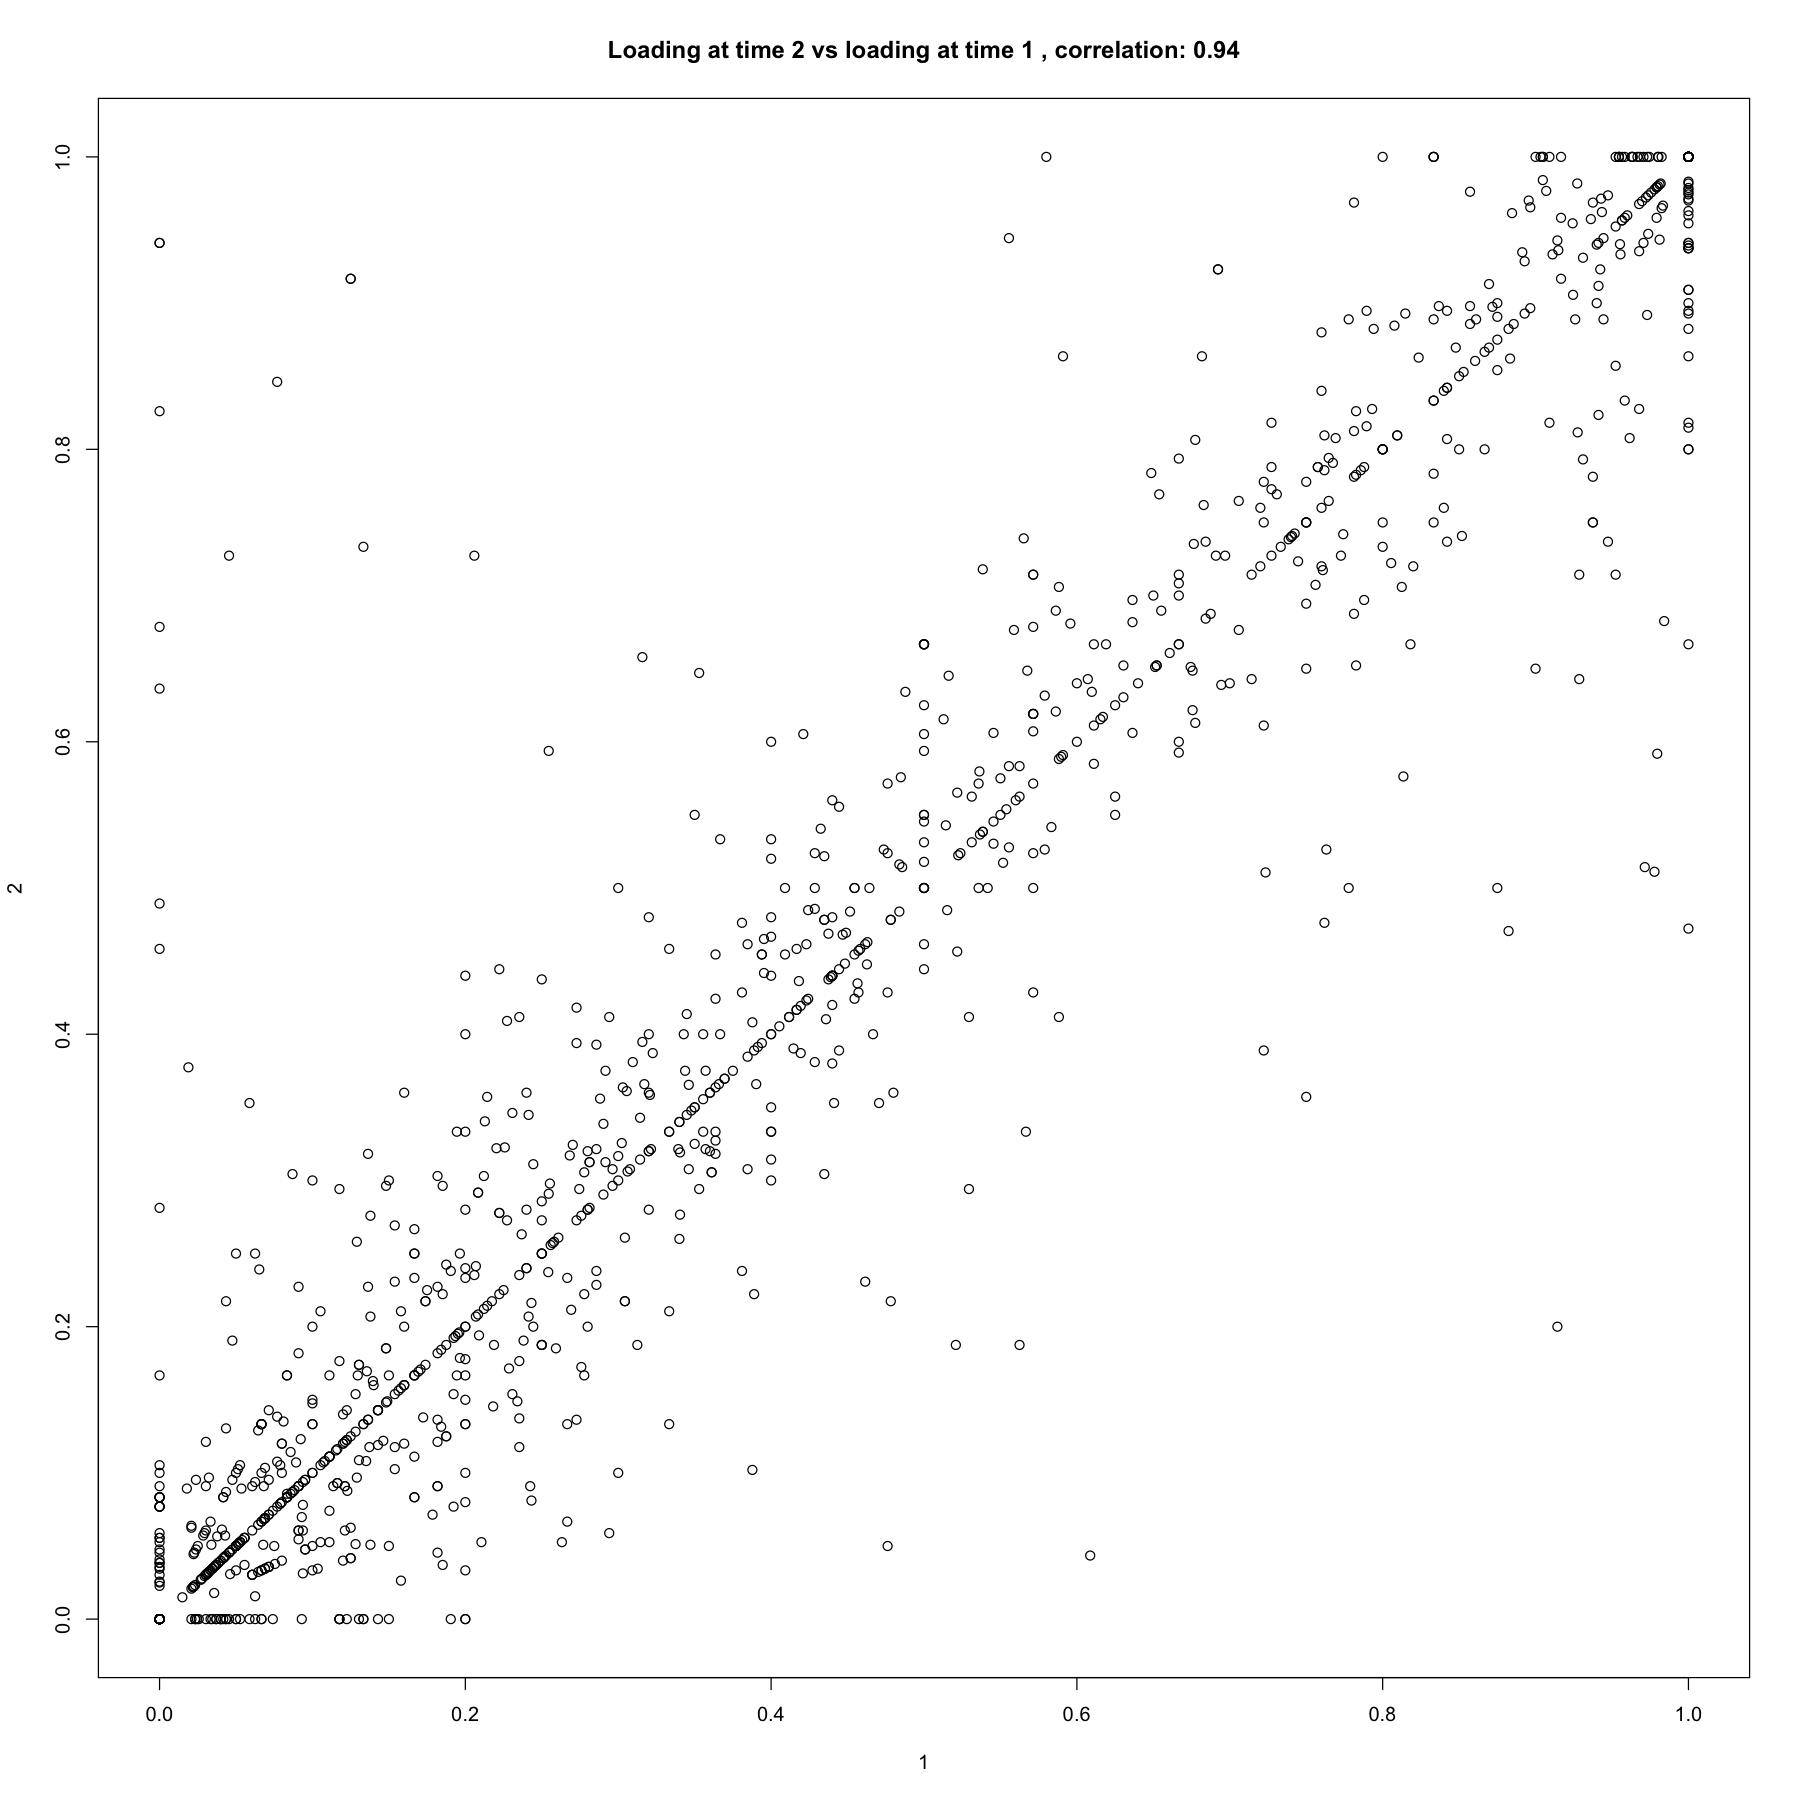

In [12]:
h <- 1
t <- 1

mycor <- round(cor(x[,t], x[,t+h]), 2)
plot(x[,t], x[,t+h], main=paste("Loading at time", t+h, "vs loading at time", t,
                                 ", correlation:", mycor), xlab=t, ylab=t + h)

This graph compares loading at times 1 and 2 and we see that these two variables are very much correlated. This makes sense since it is normal for loading to stay practically the same for an hour during the night.

We do the same plot as before for different hours of the day.

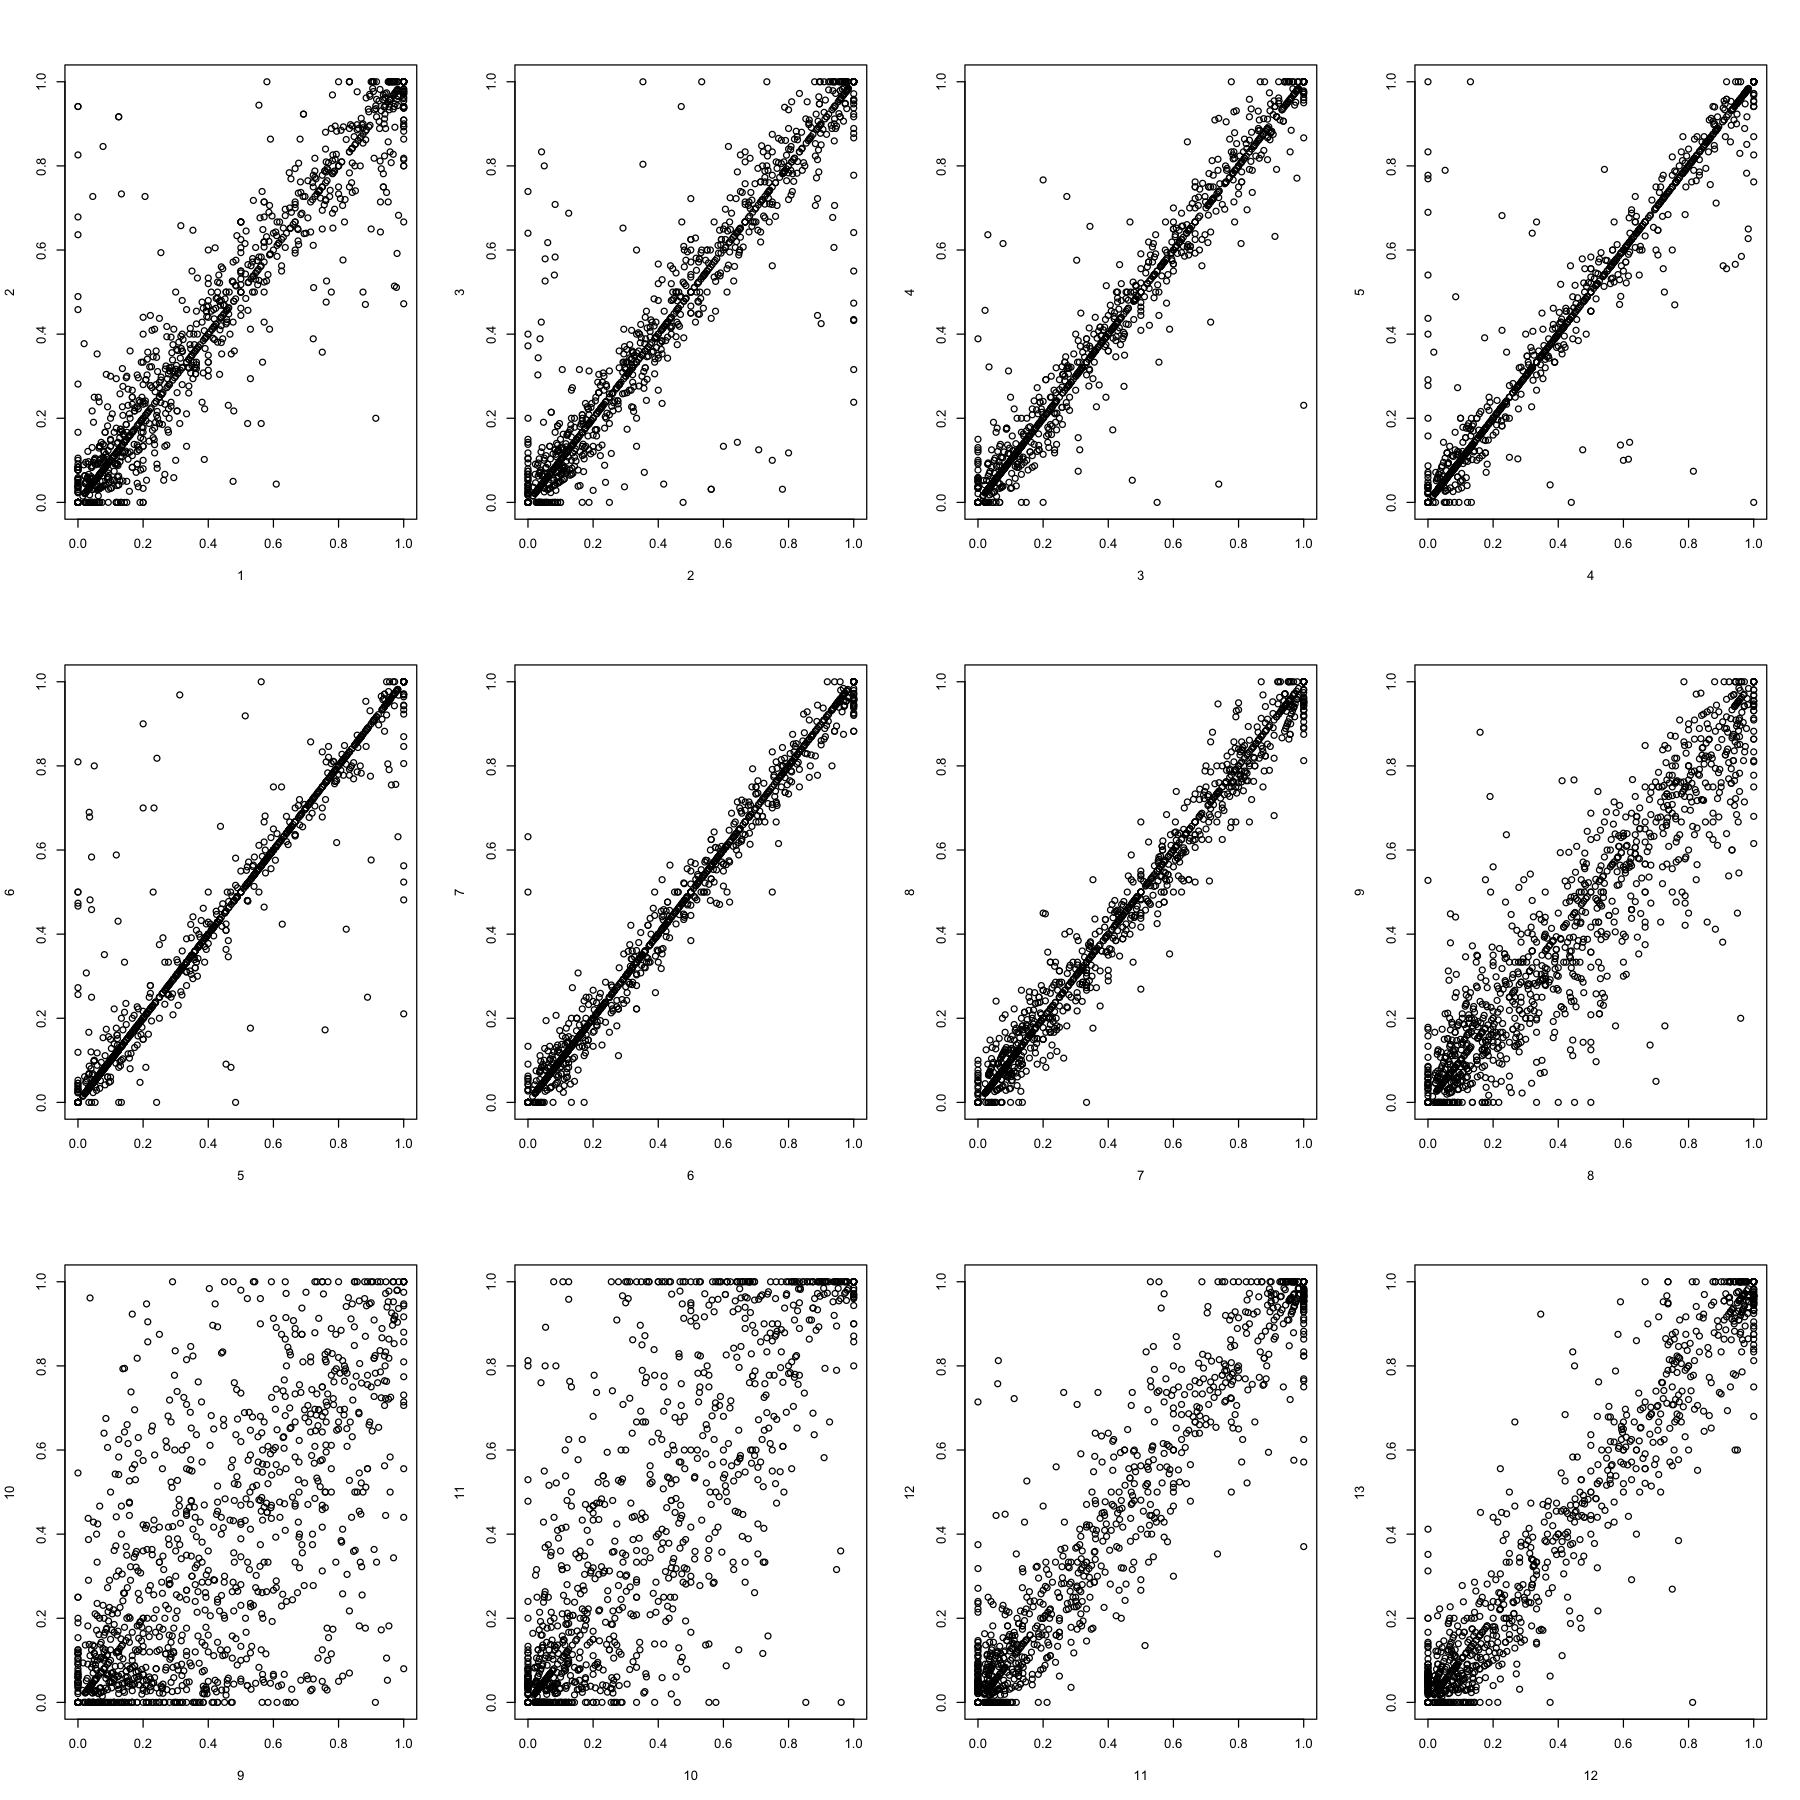

In [11]:
par(mfrow=c(3,4))
options(repr.plot.width=15, repr.plot.height=15)
for (t in 1:12) {
    plot(x[,t], x[,t+h], xlab=t, ylab=t + h)
}

Most of these graphs are strongly correlated, except for those comparing couples (9,10) and (10,11). As explained with the boxplots, this drastic change from one hour to the next happens when most people go from sleeping to going to work.

To further research correlation, we use the corrplot library to visually show the correlation degree between variables. The first image corresponding to the whole week and the second one representing only the first day.

corrplot 0.84 loaded



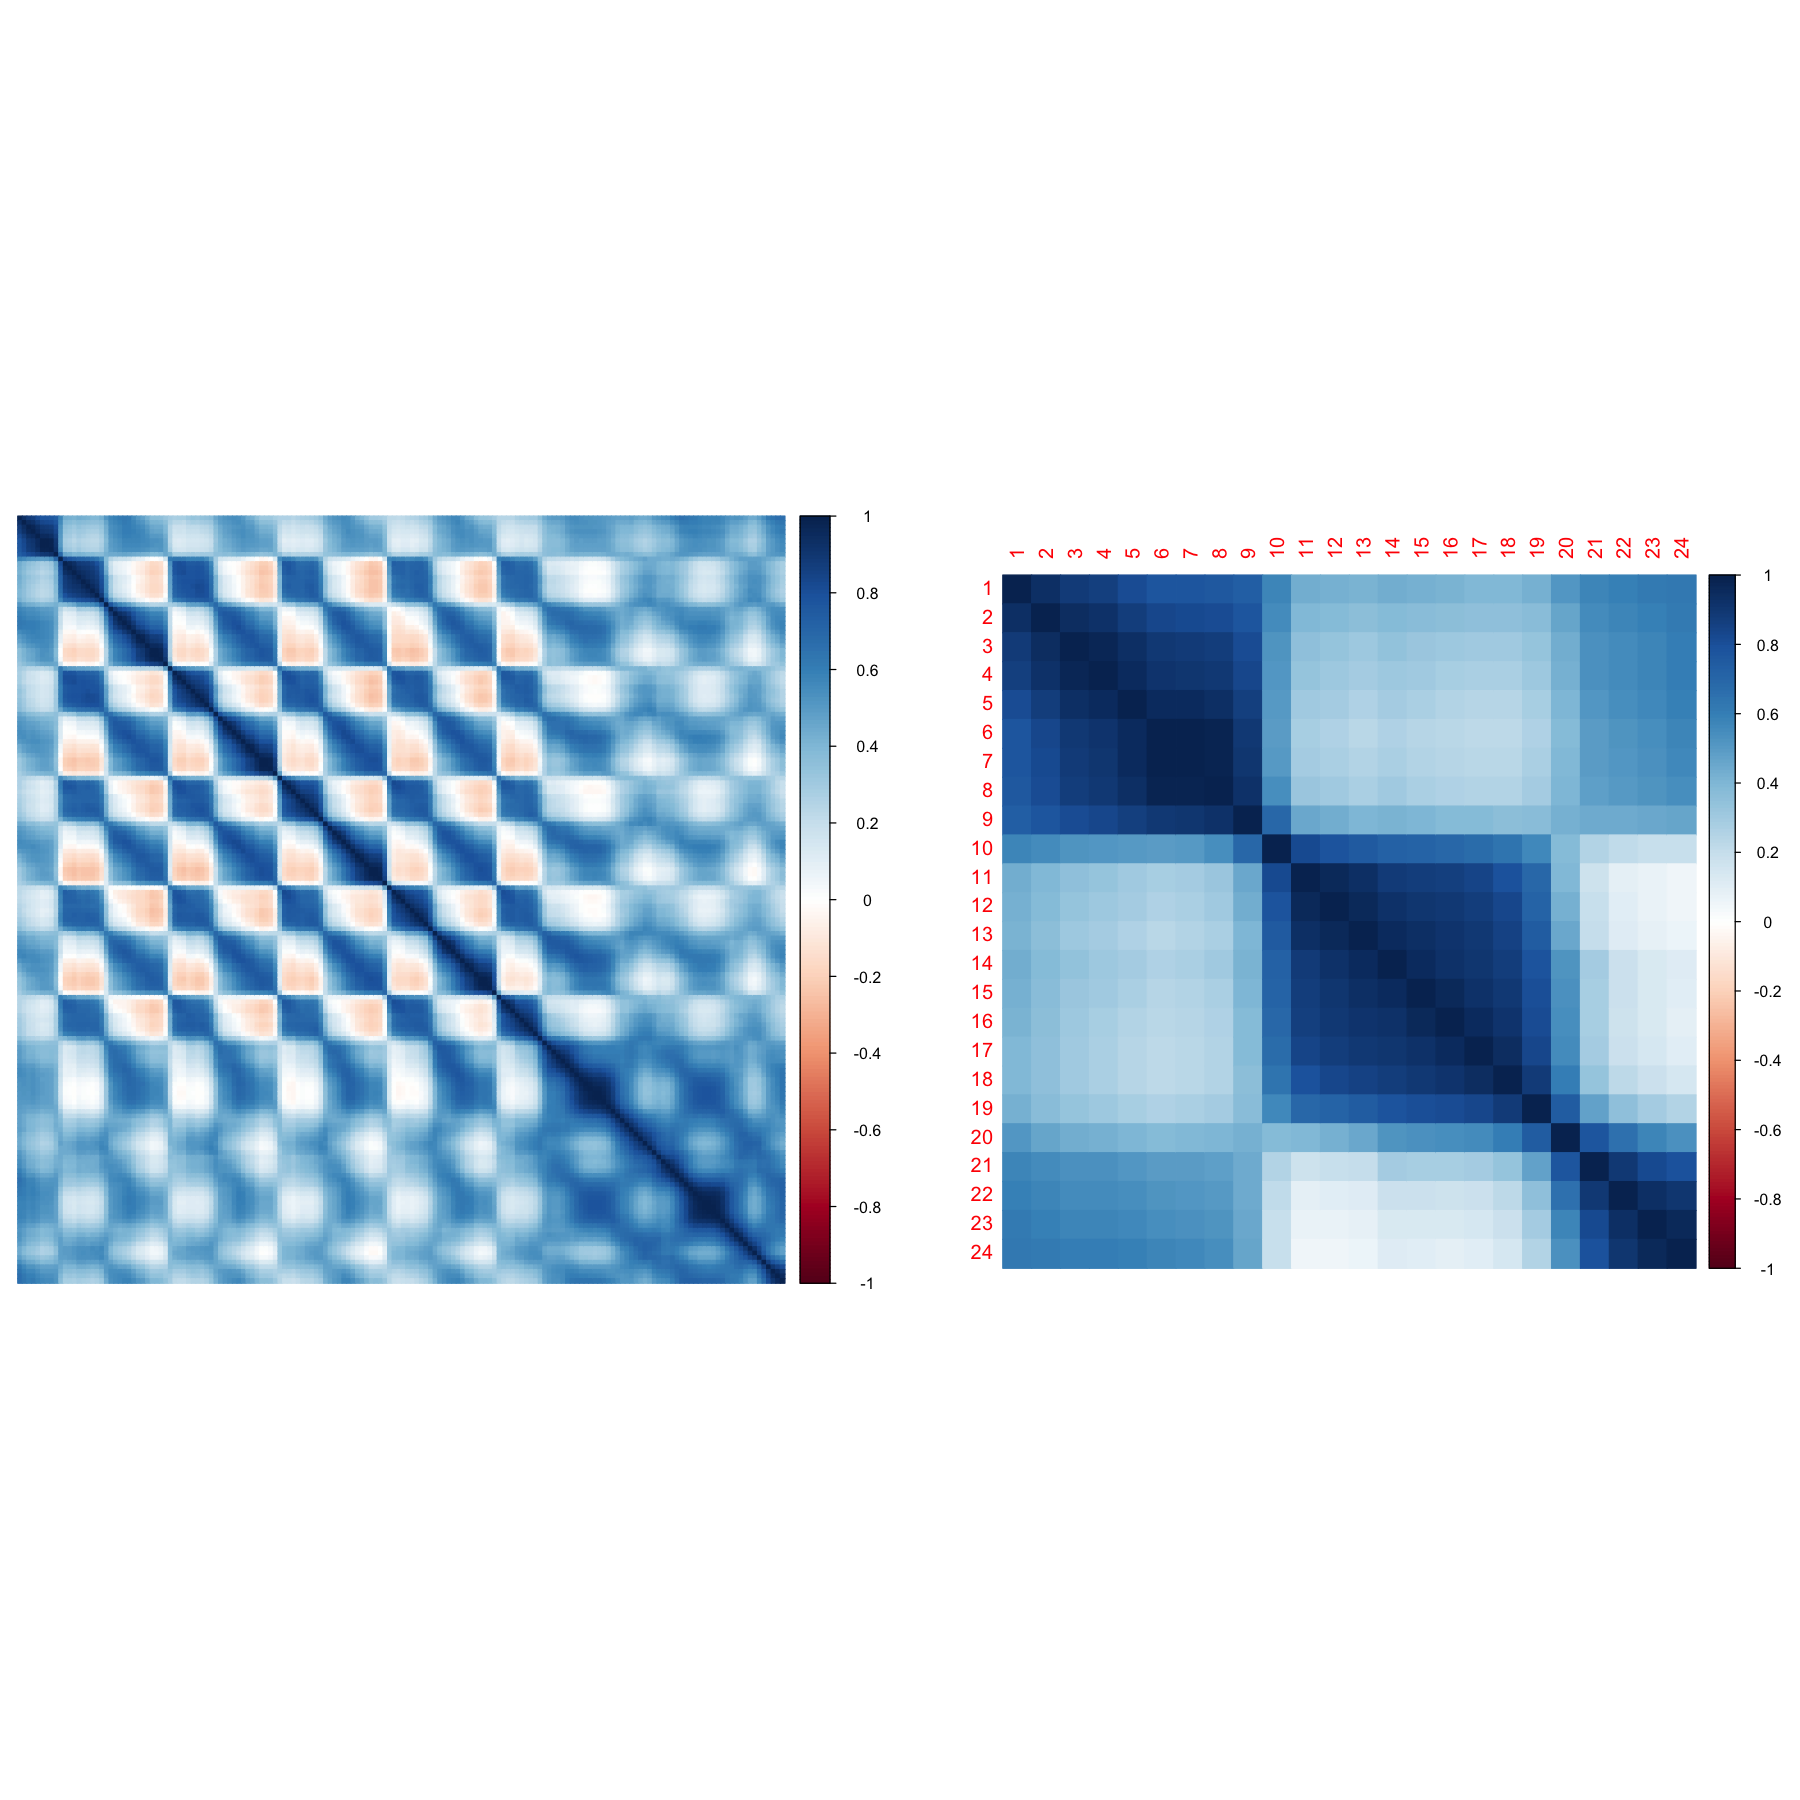

In [13]:
library(corrplot)

cormat <- cor(x)
par(mfrow=c(1,2))
corrplot(cormat, tl.pos="n", method="color")
corrplot(cormat[1:24,1:24], method="color")

By focusing on the first day we can see that the values near the diagonal have a very strong correlation. These values correspond to the graphs shown just above the corrplots (correlation between very close hours). In fact, we observe that daytime hours are strongly correlated amongst themselves, just as nighttime hours, but these two hour groups are not correlated.

This next image maps the different bike stations in the city, marking the ones situated on a hill with a red triangle.

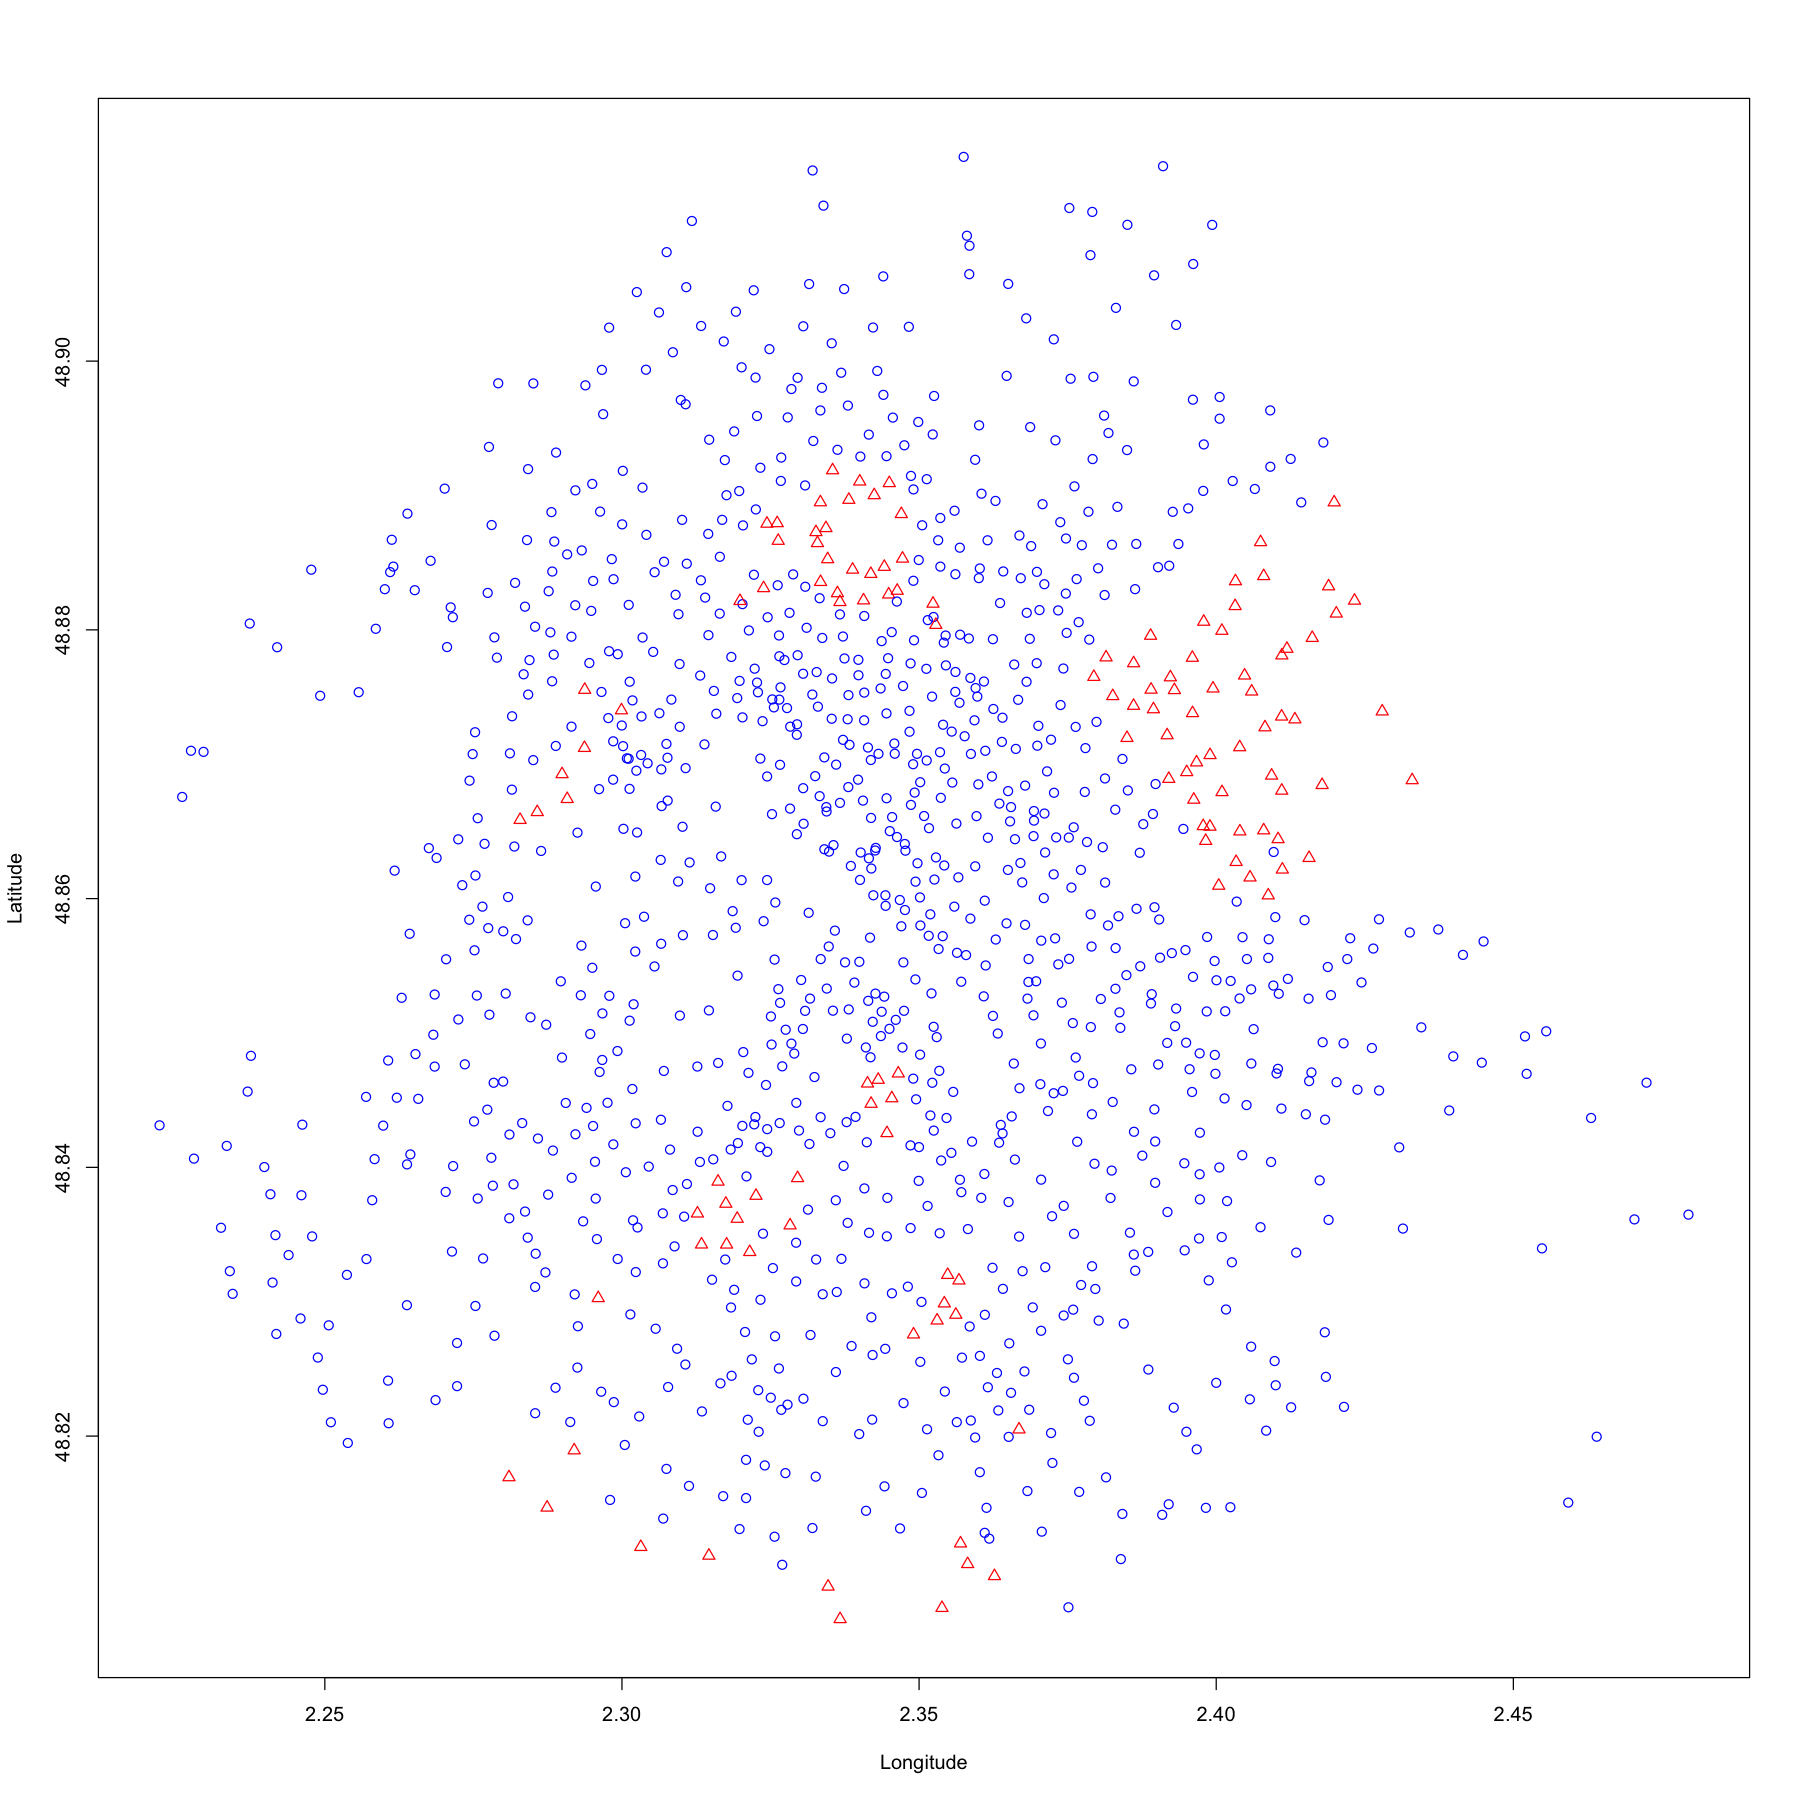

In [15]:
longitude <- velib$position$longitude
latitude <- velib$position$latitude

plot(longitude, latitude, col=ifelse(velib$bonus==1, "red", "blue"),
     xlab="Longitude", ylab="Latitude", pch=velib$bonus+1)

We do the same boxplots as before, but this time only taking into account the bike stations located on a hill.

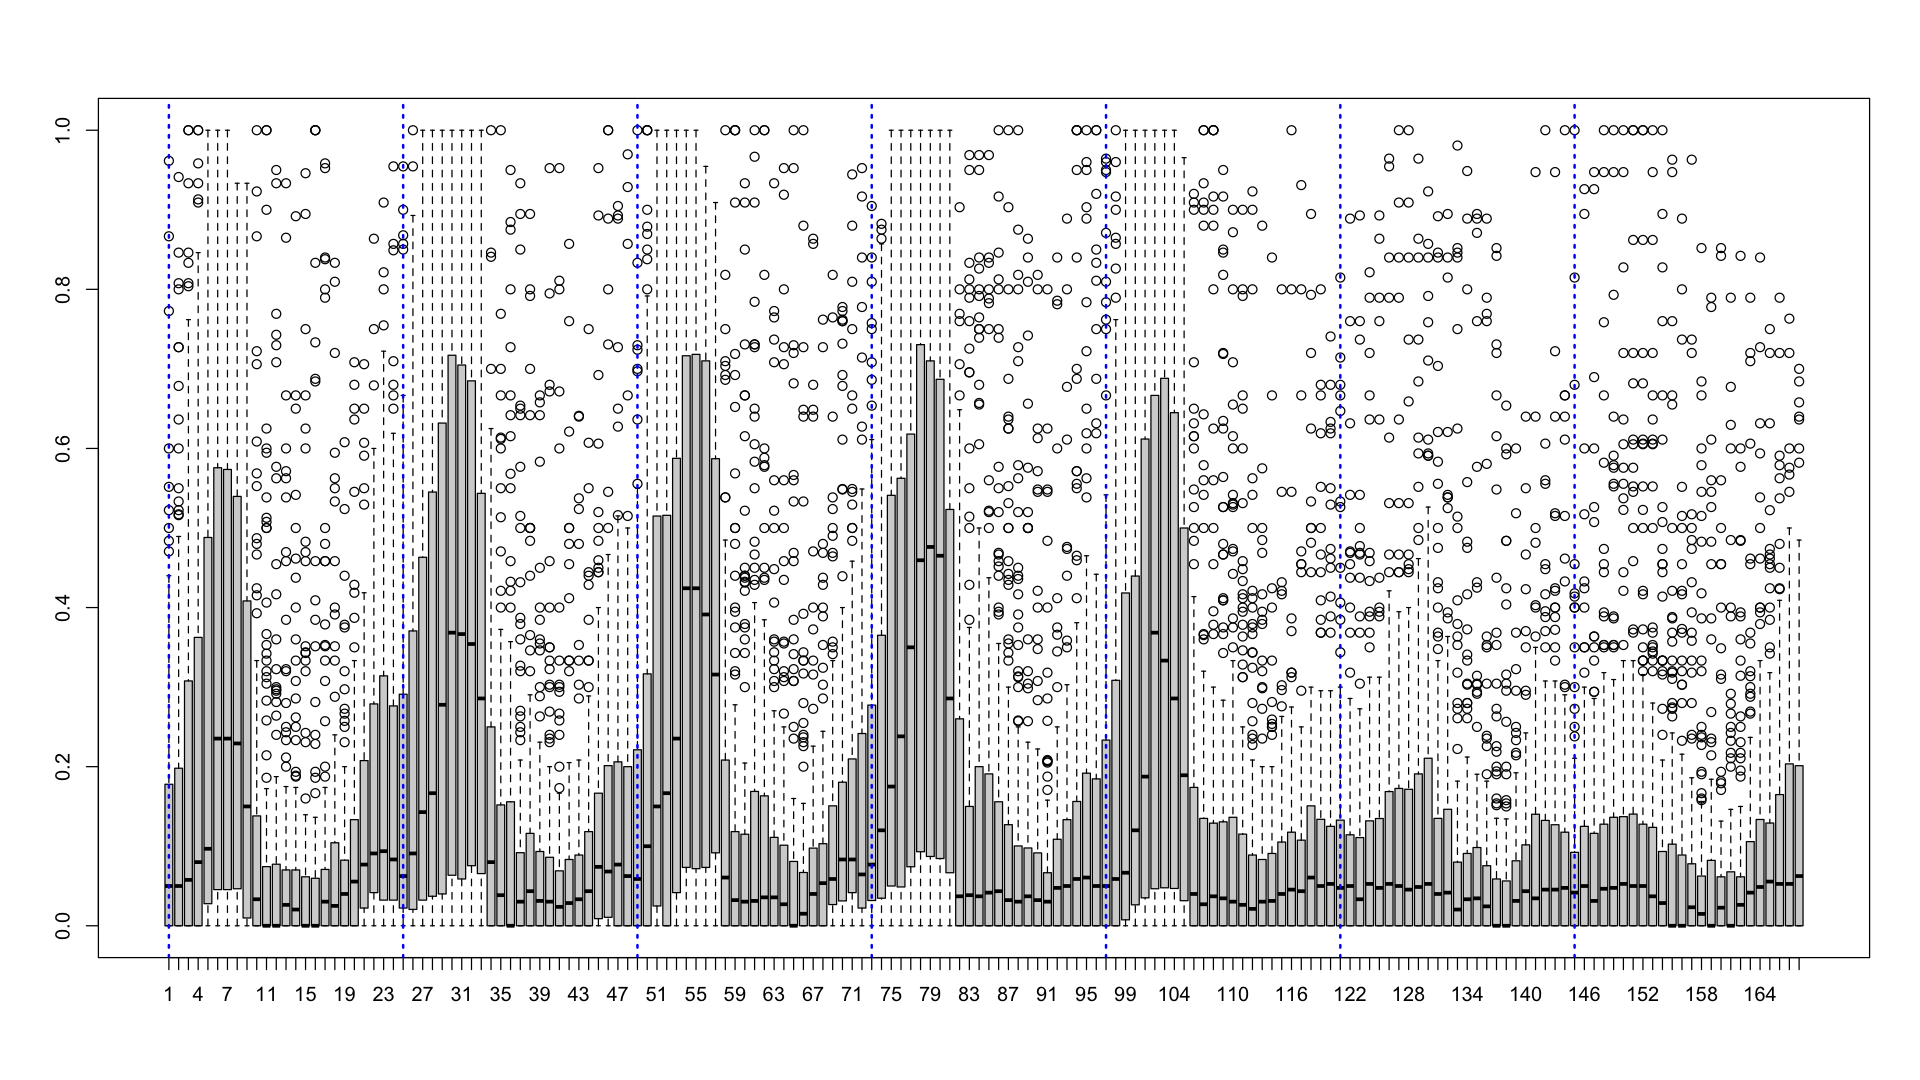

In [16]:
colline <- which(velib$bonus == 1)

options(repr.plot.width=16, repr.plot.height=9)
boxplot(x[colline,])
abline(v=timeTick, lty="dotted", col="blue", lwd=2)

This graph is not as clean as the one before; this one having plenty of outliers. We can however still see that there is a certain pattern during the weekdays, and another one during the weekend.

In [17]:
Now we do another boxplot containing only the bike stations that are not on a hill.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: Now we
        ^


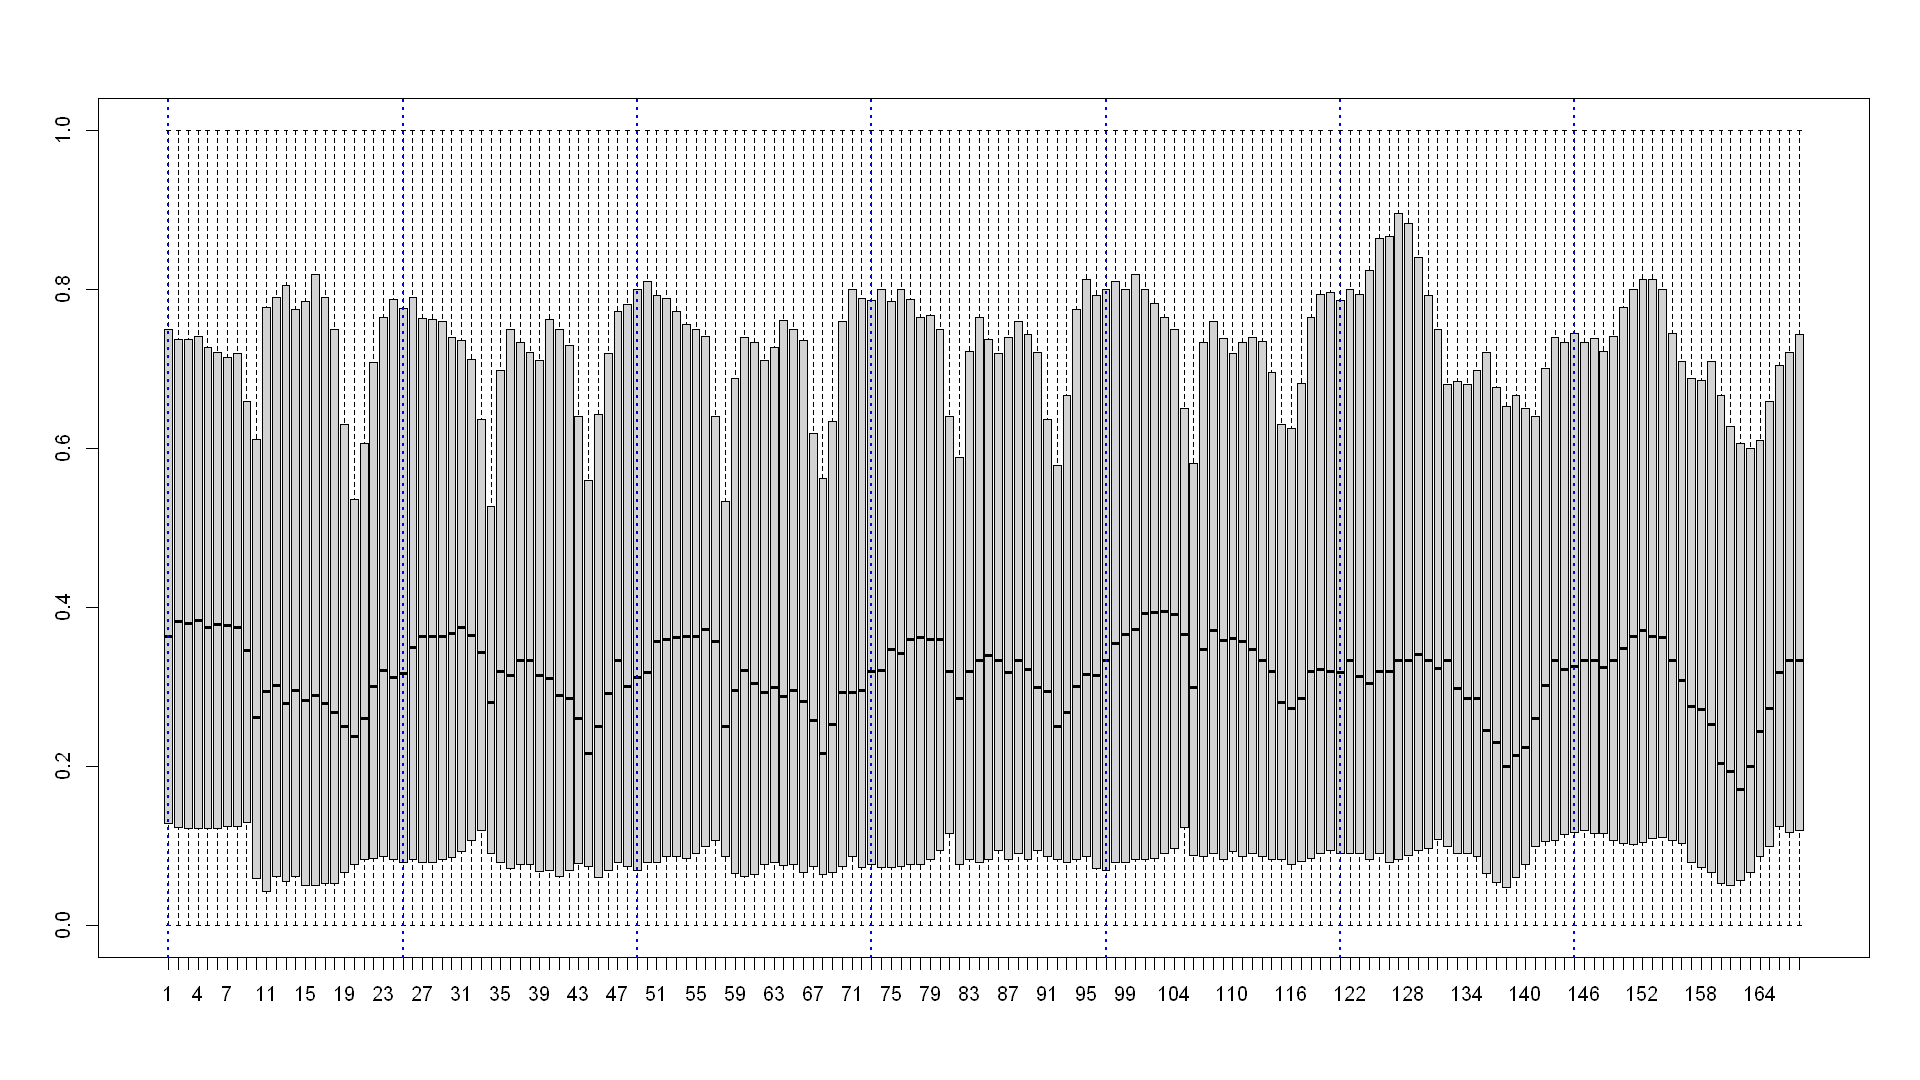

In [11]:
no.colline <- which(velib$bonus == 0)

options(repr.plot.width=16, repr.plot.height=9)
boxplot(x[no.colline,])
abline(v=timeTick, lty="dotted", col="blue", lwd=2)

We find that this boxplot is practically the same as the one containing all of the bike stations, which makes sense since most of the stations are not on a hill.